In [ ]:
# Load the data folder in the share drives
# The data folder is in the 'drive/Shareddrives/Ada'
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [ ]:
# installing required packages
!pip install pandas==1.0.5
!pip install textblob


     |████████████████████████████████| 10.1 MB 5.6 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.0.5 which is incompatible.


In [ ]:
# Import needed libraries:

import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import warnings
import pickle
import shutil
import os
import glob
import wordcloud
import nltk
import re
warnings.filterwarnings('ignore')
import requests 
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import sys
import spacy
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim (for LDA)
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import plotly.express as px

#URL parsing
from urllib.parse import parse_qsl, urljoin, urlparse

#Plots
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Date
from datetime import datetime

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# loading NLTK Stop words

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

# Import Data

In [ ]:
# importing the processed/picked  data:
df=pd.read_pickle('/content/drive/Shareddrives/Ada/Uniform/All_attribute_version1312.pkl')

In [ ]:
#printing the first lines:
df.head()

,id,quoteID,quotation,speaker,probas,date,numOccurrences,urls,phase,label,date_of_birth,nationality,gender,ethnic_group,occupation,party,academic_degree,religion,polarity_TextBlob,polarity_SentimentIntensityAnalyze,polarity_Flair,polarity,emotion,day,year,just_date,domains,TLD,domain_country
0,Q20251661,2020-01-31-011304,Brexit is the victory of the common people aga...,Laura Huhtasaari,"[[Laura Huhtasaari, 0.9325], [None, 0.059], [P...",2020-01-31 03:25:04,1,[http://voanews.com/europe/shrug-and-some-sorr...,E,Laura Huhtasaari,[+1979-03-30T00:00:00Z],Finland,female,0,politician,Finns Party,0,Lutheranism,-0.022619,0.5719,0.663805,0.571900,positive,2020-01-31,2020,2020-01-31,[voanews.com],com,NaN
1,Q694676,2020-02-13-014393,Certainly Brexit was a big issue and people we...,Pat McFadden,"[[Pat McFadden, 0.9371], [None, 0.0535], [Jere...",2020-02-13 06:01:30,1,[http://www.expressandstar.com/news/politics/2...,E,Pat McFadden,[+1965-03-26T00:00:00Z],United Kingdom,male,0,politician,Labour Party,0,0,-0.161905,-0.2500,0.997470,-0.161905,negative,2020-02-13,2020,2020-02-13,[www.expressandstar.com],com,NaN
2,Q1341937,2020-03-08-010480,"I backed leave and voted leave, but I never ca...",Jason McCartney,"[[Jason McCartney, 0.8274], [None, 0.128], [Li...",2020-03-08 05:45:58,1,[http://www.yorkshirepost.co.uk/news/second-ti...,E,Jason McCartney,[+1973-09-03T00:00:00Z],United States of America,male,0,sport cyclist,0,0,0,0.000000,-0.4243,0.595703,0.000000,negative,2020-03-08,2020,2020-03-08,[www.yorkshirepost.co.uk],uk,United Kingdom
3,Q6837191,2020-02-14-058019,"legacy, bad faith on pensions, Brexit and poli...",Michelle O'Neill,"[[Michelle O'Neill, 0.8055], [None, 0.1302], [...",2020-02-14 11:48:49,1,[https://www.belfasttelegraph.co.uk/news/north...,E,Michelle O'Neill,[+1977-01-10T00:00:00Z],Northern Ireland,female,0,politician,Sinn Féin,0,0,-0.233333,-0.0516,0.951277,-0.051600,negative,2020-02-14,2020,2020-02-14,[www.belfasttelegraph.co.uk],uk,United Kingdom
4,Q1728820,2020-01-27-094916,"we're only at half-time on Brexit, it's not do...",Leo Varadkar,"[[Leo Varadkar, 0.9378], [None, 0.0502], [Bori...",2020-01-27 12:25:00,1,[http://blogs.independent.co.uk/voices/brexit-...,E,Leo Varadkar,[+1979-01-18T00:00:00Z],Ireland,male,0,politician,Fine Gael,0,0,0.000000,0.0000,0.946059,0.000000,negative,2020-01-27,2020,2020-01-27,[blogs.independent.co.uk],uk,United Kingdom


In [ ]:
# printing all the columns:
df.columns

Index(['id', 'quoteID', 'quotation', 'speaker', 'probas', 'date',
       'numOccurrences', 'urls', 'phase', 'label', 'date_of_birth',
       'nationality', 'gender', 'ethnic_group', 'occupation', 'party',
       'academic_degree', 'religion', 'polarity_TextBlob',
       'polarity_SentimentIntensityAnalyze', 'polarity_Flair', 'polarity',
       'emotion', 'day', 'year', 'just_date', 'domains', 'TLD',
       'domain_country'],
      dtype='object')

#DATA STORY/ Pipeline:
**I - The media's coverage of Brexit from 2015 to 2020 considering data in Quotebank:**


1. How many quotations are related to Brexit?
2. When did the media start to mention Brexit? 
3. How did the number of quotations change over time?

  
**II - Media views towards Brexit:**


1. Which media have relayed the information the most?
2. What is the country of origin of these media?
3. What media and websites tend to have positive or negative statements towards the situation?
4. How sentiments of quotations revealed by top 10 medias change over recent years? 


**III - Who issued these quotes, and what were the main opinions:**


1.  Plot: Word cloud of the quotation :
2. How many active speakers are mentioned?
3. Most active speaker with different Sentiment towards Brexit
4. What are the main topics discussed
5. Where do they come from?
6.  How has the number of active speakers changed over the different periods of Brexit? 
7. What is their sentiment about the situation, content or not content, independently of their opinion on pro or against Brexit?
8. Did they change their perception during this period?
9. How are the different sentiments of the speakers distributed by countries?


# Methods: 

* To merge quotebank with the additional datasets, we have filtered those quotations related to Brexit by identifying possible keywords related to Brexit. We have already combined quotations with speaker attributes by joining with QIDs.  We also scrapped [the web page](https://icannwiki.org/Country_code_top-level_domain) to get the domain countries using beautiful soup for future analysis.


* We then carried out a sentiment analysis, for that we used the results of three packages: Textblob, SentimentIntensityAnalyze and Flair. We have then taken the median of the three resulting polarities. To subsequently decide on the thresholds to choose for classifying the emotions (Positive, Negative, or Neutral), we manually labeled 100 quotes and selected the thresholds accordingly.  It is critical to note that the resulting emotion does not reflect the direct view or perception of the Brexit, i.e. pro or con. The resulting emotion is based on the tone of the quote. As an example (fabricated), the two quotes: "Brexit is crucial, staying in the union would be a catastrophe, a suicide" and "Staying in the union is crucial, leaving would be a catastrophe, a suicide" will both be assigned a negative emotion by design even though they stand for two different opinions.


* We also performed an LDA topic modeling to get an insight about the most relevant subjects. This approach allowed us to notice clearly the different names involved with Brexit like Theresa May, Boris Johnson, Donald Trump, David Cameron etc..

  Also, this analysis revealed some major keywords that allowed us to get some ideas about what was beeing discussed.

   We can see that some of the speakers are projecting the Brexit as an opportunity for a better change, and some of them are reflecting all the risks that may accure, stating words like (risk, damage, lose, crisis, impact etc..).
And also, we can see how some keywords are reflecting the will the stay in europe (partners, stay, deal, relationship, members etc).

  But, this was not enough for us since we thout it would be more interesting to see the position of the most involved speakers with Brexit.

  That's why we looked at the the most active ones and divided our research into 3 different timelines:
  - just before the referendum (before 2016-06-20)
  - period of referendum (from 2016-06-21 to 2016-06-25) 
  - and just after (after 2016-06-26)

  And at the same time, we were interested in answering these questions:

  1) From which countries are speakers the most interested in Brexit?

  2) Who are the most relevant speakers?

  3) What's their opinion during those different periods?


  The distribution of quotations by speakers' nationality confirmed our hypothesis: countries with the most interest with United Kingdom are the most involved with the Brexit situation. 

  We also distinguished the main speakers by their activity throughout the Brexit period of time.
  

  Our analysis just allowed ton conclude more about the position of the most relevant speakers at that time.

  


* Spectral clustering was applied for speakers and for different subclasses of occupation over time.  We first encoded the category features-nationality, polarity, and occupation-using two methods: hot encoding and target encoding. We then used the T-SNE method to compress the features and generate tsne_x,tesn_y so that they could be plotted in 2D or 3D graphs. We obtained some plots and results, but we will leave the final interpretation and more advanced implementation of the T-SNE approach to be done as a future improvement of our T-SNE method. You can find the first results, uncommented, of the cluster analysis at the end of this notebook. 

-----------
## I. Media's Coverage


### I.1 How many quotations are related to Brexit?  

The original Quotebanks dataset contains 115,584,257 records.
As described in the DataPreProcessing notebook, we initially extracted quotes that were solely about Brexit, the United Kingdom and/or the European Union. We then proceeded with filtering these records to consider only those containing one of the words from the following list: leave campaign and remain campaign, no deal, transition period, leave, withdral, referendum and split from as Brexit-related quotes. 

As a result, we ended up with 101,878 Brexit-related citations for more in-depth analysis.

In [ ]:
print("The number of Quotation related to Brexit is {}".format(df.shape[0]))

The number of Quotation related to Brexit is 101878


In [ ]:
print("The number of all Quotation is {}".format(nb_quatations))

The number of all Quotation is 115584257


### I.2 When did the media start to mention Brexit?


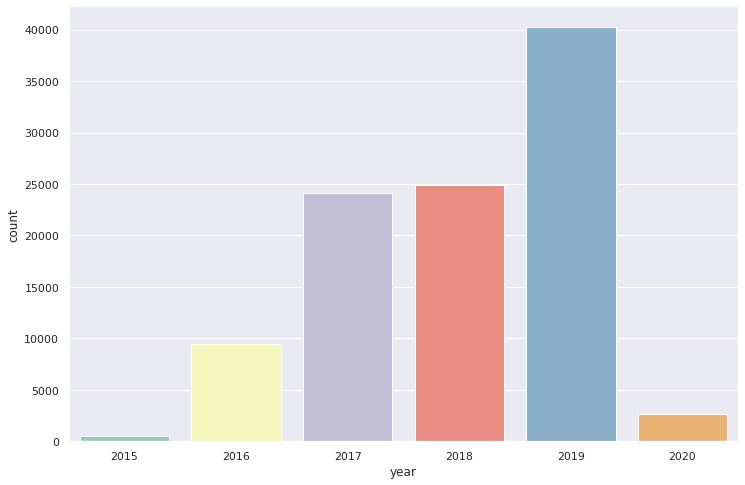

In [ ]:
# plotting Barplot of the total number of Brexit quotation per year:
plt.figure(figsize=(12,8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="year", data=df,palette="Set3")
plt.show()

Looking at the proportion of each year

In [ ]:
percentages=df.groupby(['year'])['id'].count()
percentages=percentages.tolist()
percentages = [x * 100/101878 for x in percentages]
print("Percentages of quote representation during year : \n 2015={:.2f} % \n 2016={:.2f}% \n 2017={:.2f}% \n 2018={:.2f}% \n 2019={:.2f}% \n 2020={:.2f}% \n".format(percentages[0],percentages[1],percentages[2],percentages[3],percentages[4],percentages[5]))

Percentages of quote representation during year : 
 2015=0.50 % 
 2016=9.28% 
 2017=23.69% 
 2018=24.46% 
 2019=39.51% 
 2020=2.56% 



Always considering the filtered Quotebank data, the graph above represents the number of citations related to the Brexit over the years. We first notice that before 2015, only a few hundred citations were related to Brexit. This switches in 2016 - the year when the Brexit was voted-  and we can see that until 2019, the number of citations will keep increasing until waiting for its peak. Yet in 2020, we witness a sharp drop. We suggest that this is because most news stories were relaying information about the coronavirus at that time. Another theory would be that the data was not completely extracted from year 2020. 


In order to further analyze this trend over the years, we look at what happens each year while looking at the dates that marked the Brexit.



### I.3   How did the number of quotations change over time? 
We are interested in looking at how the number of quotation change over time with more details and consider how some important dates may have affected the occurence of quotations.


In [ ]:
# load the data and aggregate them by day:
df_timeseries=df.groupby(['just_date'])['id'].count().reset_index().rename(columns={'just_date':'date','id':'counts'})
df_timeseries

,date,counts
0,2015-01-01,1
1,2015-01-04,1
2,2015-01-07,2
3,2015-01-08,2
4,2015-01-14,2
...,...,...
1637,2020-04-12,1
1638,2020-04-13,2
1639,2020-04-14,3
1640,2020-04-15,2


In [ ]:
# creating the right set up to use plotly since we want all our plot exported to our website
keydates = list()
for i in (datetime(2016, 6, 23),datetime(2016,7,13),datetime(2017,3,29),datetime(2018,11,25),datetime(2017,12,8),datetime(2019,6,24),datetime(2019,7,24),datetime(2019,8,28),datetime(2019,10,2),datetime(2019,10,19),datetime(2020,1,31),datetime(2020,10,16)):
    keydates.append({'type': 'line',
                     'line': dict(
                        color="red",
                        width=0.6,
                    ),
                    'xref': 'x',
                    'yref': 'y',
                    'x0': i,
                    'y0': 0,
                    'x1': i,
                    'y1': 600})

# Scatter plot:
timeseries_data = go.Scatter(x=df_timeseries['date'],
                        y=df_timeseries['counts'].values,
                        line=go.scatter.Line(color='blue', width = 0.6),
                           opacity=0.8,
                           name='number of quotations',
                           text=[f'number of quotations: {x:.0f}' for x in df_timeseries['counts'].values])


# Create a layout with a rangeselector and rangeslider on the xaxis
layout = go.Layout(font=dict(size=18),
                   title='Number of quotations change over time',
                   xaxis=dict(title='Date',
                                        # Initialisen range selector
                                         rangeselector=dict(
                                             # Buttons for selecting time scale
                                             buttons=list([
                                                 # button for 1 month
                                                 dict(count=1,
                                                      label='1m',
                                                      step='month',
                                                      stepmode='backward'),
                                                 # button for 1 week
                                                 dict(count=7,
                                                      label='1w',
                                                      step='day',
                                                      stepmode='todate'),
                                                 # button for 1 day
                                                 dict(count=1,
                                                      label='1d',
                                                      step='day',
                                                      stepmode='todate'),
                                                 # button for all days
                                                 dict(step='all')
                                             ])
                                         ),
                                         # create the range slider
                                         rangeslider=dict(visible=True),
                                         type='date'), 
                   shapes=keydates,
                   yaxis=dict(title='Number of quotations')
                   )

fig = go.Figure(data=[timeseries_data], layout=layout)
iplot(fig)

In the graph above, we can see the number of quotes related to Brexit over time.
 The red vertical lines correspond to the following important dates:
  - *June 23, 2016* - The UK votes to leave in a referendum. The "Leave" camp, which favors the UK's exit from the EU, won with 51.9%, compared to 48.1% for the pro-EU "Remain" camp.
  - *July 13, 2016* - Theresa May becomes Prime Minister following the resignation of David Cameroon. 
  - *March 29, 2017* - Warning: two-year countdown to the UK's exit from the European Union. The UK is then negotiating an exit agreement. 
  - *December 8, 2017* - Birth of the backstop: tensions form on Irish borders. In the event of an exit without an agreement of the United Kingdom from the EU, the 500 kilometers that separate the British province of Northern Ireland from the Republic of Ireland could become a physical border again. As London has decided to leave the single market and the customs union, which are synonymous with freedom of movement and common standards and customs duties, border controls will be necessary. However, this return to a border between the two countries would weaken the Good Friday Peace Agreement, which ended, in 1998, thirty years of armed conflict between nationalists and unionists in Northern Ireland.
  - *November 25, 2018*- After a period of calm, the subject of the Backstop resurfaces a second time. 
  - *June 24, 2019* - May takes a bow: Theresa May submits her resignation, following her failure to pass her plan to withdraw from the European Union.
  - *July 24, 2019*- the Johnson era begins: Boris Johnson is elected leader of the Conservative Party the following year, he succeeds Theresa May as Prime Minister, promising a rapid exit of the United Kingdom from the European Union.
  - *28 August 2019*- Parliament put on ice for 5 weeks: In August, reports emerged that the new PM had asked the Queen to suspend Parliament for five weeks in the run-up to 31 October.
  - *2 October 2019* - Johnson sets out his ‘reasonable compromise’ Brexit deal: By early October, the PM had made a formal proposal to the EU setting out his alternative to the Irish backstop. He claimed his plan was “entirely compatible with maintaining an open border in Northern Ireland”, unlike the “bridge to nowhere” backstop.
  - *19 October 2019* - the showdown: Parliament hosted a special session for MPs on Saturday 19 October - less than two weeks before the Halloween Brexit deadline. It was the fifth time Parliament sat on a Saturday for 80 years, with the previous occasions including include the day before the outbreak of the Second World War, the Suez Crisis in 1956 and the Falklands War in 1982, says The Guardian. Johnson was legally obliged by the Benn Act to send a letter to the EU on that date requesting a three-month Brexit extension after Parliament refused to pass his deal.
  - *31 January 2020* – departure day: Having won the majority he so desired in December, Johnson passes his withdrawal agreement, paving the way for the UK to leave the EU on 31 January.
  - *16 October* – Johnson backs away: after multiple events, Johnson says the UK should “go for the Australia solution” as he announced that it’s time to “get ready" for the prospect of no-deal Brexit.

source: https://www.theweek.co.uk/100284/brexit-timeline-key-dates-in-the-uk-s-break-up-with-the-eu


On the graph, we can see that before the vote on June 23, 2016, the number of citations was very limited. The number started to increase until July 13, 2016, the day Theresa May became PM, before dropping again and entering a stationary phase. 
We anticipated seeing more dramatic variations in the number of quotes tying in with these specific dates, though we must keep in mind that the plot only considers data from Quotebank, which may not represent what is actually shared by all media outlets.


In [ ]:
# render a html link to add the plot to our website 
fig.write_html("/content/drive/Shareddrives/Ada/output_plots/keydates_timeseries.html")

## II - Media views towards Brexit:

**Note:** Throughout this report, we will use both the terms domain and media interchangeably to refer to the source outlets. 

### II.1 Which media have relayed the information the most? 
First, we look at how many unique media we have. 

In [ ]:
print("The number of unique domains is ",df['domains'].apply(lambda x: x[0]).nunique())

The number of unique domains is  3990


In [ ]:
# From nested list to text
df['domains']=df['domains'].apply(lambda x: x[0])

In [ ]:
# group by id and do the counts to plot later:
df_domains = df.groupby(df['domains'])['id'].count().reset_index().rename(columns={'id':'counts'}).sort_values(['counts'],ascending=False)

In [ ]:
# top 10 domains
df_domains.head(10)

,domains,counts
484,express.co.uk,3819
1895,www.belfasttelegraph.co.uk,3147
674,heraldscotland.com,2275
3270,www.politico.eu,1976
3037,www.msn.com,1960
1829,www.aol.co.uk,1755
1958,www.breitbart.com,1546
3272,www.politicshome.com,1525
738,inews.co.uk,1500
2995,www.mirror.co.uk,1389


In [ ]:
# Visualise the top 20 media which relayed the information the most
fig = px.bar(df_domains.head(20),x='counts', y='domains', orientation='h')
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

fig.show()

fig.write_html("/content/drive/Shareddrives/Ada/pickle/top20_media.html")

Among the top medias we see:

* The Daily Express (here Express) and its sister paper - the Sunday Express are daily national middle-market and conservative tabloid newspapers in the United Kingdom. 
* The Belfast Telegraph is a daily newspaper published in Belfast, Northern Ireland, by Independent News & Media. 
* The Herald is a Scottish broadsheet newspaper founded in 1783. The Herald is the longest running national newspaper in the world and is the eighth oldest daily paper in the world.
* The Politico is a political journalism company based in Arlington County, Virginia, that covers politics and policy in the United States and internationally. It primarily distributes content online but also with printed newspapers, radio, and podcasts. 
* MSN.com is a visited portal website provided by Microsoft. 

We are willing to investigate their sentiments and the pitch in which they relayed the news about the Brexit.

### II.2 What is the country of origin of these media?

We now look at the country of origin of the media. 

In [ ]:
# Remove null values in countries
domain_country_df=df[df['domain_country'].notnull()].reset_index()
# Read 3-digits ISO code for 
country_code_df=pd.read_csv('/content/drive/Shareddrives/Ada/countries_codes.csv')
country_code_df=country_code_df[['country','id']]
country_code_df=country_code_df.rename(columns={'id':'country_code'})

In [ ]:
# count the country domains
count_domain_countries=domain_country_df.groupby(['domain_country'])['domains'].nunique().reset_index()
count_domain_countries=count_domain_countries.rename(columns={'domain_country': 'country','domains': 'number of medias'}).sort_values(['number of medias'],ascending=False)

Then considering only the number of quotations in UK domain:

In [ ]:
freq_uk = 0
for index, row in df_domains.iterrows():
  if row['domains'].endswith('uk'):
    freq_uk += row['counts']

freq_uk

print('The percentage of the number of quotations in UK domains compared total: {:.2%}'.format(freq_uk/total_quotes))

the percentage of the number of quotations in UK domains compared total: 36.18%


**Note**: to decide to which country each domain is assigned, we used the link that can be not always reliable since some domains can use .com.

Now considering the medias worldwide and plotting them on an interactive map:

In [ ]:
# preparing data for pyplot:
plot_domain_country=pd.merge(left=count_domain_countries, right=country_code_df, how='left', on='country')

In [ ]:
# Since it's not possible to include the whole european union on map, we pick france as the representative country in European Union to be shown in the futher plot
plot_domain_country.at[8,'country_code']='FRA'
plot_domain_country.loc[8]

country             European Union
number of medias                14
country_code                   FRA
Name: 8, dtype: object

In [ ]:
# map plot
fig = px.scatter_geo(plot_domain_country, locations="country_code", color="country",
                     hover_name="country", size="number of medias",
                     projection="natural earth")
fig.show()

As we can see in the map above, the majority of the media concentration is in the UK. In second place we find, Europe in wide and several Commun Wealth countries like Australia, Canada, South Africa and New Zealand.

### II.3 What media and websites tend to have positive or negative statements towards the situation? 

In [ ]:
# Here we care about the domain and their emotion
df=df[['domains','emotion']]
df['domains'] = df['domains'].map(lambda a: a[0])

# Filter out the "www." and ".com"
words=["www.",".com"]
for word in words:
     df['domains'] = df['domains'].str.replace(word, ' ')

# Get top K datasets based on feature in dataframe
def top_k_feature(X,feature,k):
  X_=pd.DataFrame()
  a=X[feature].value_counts()[:k].index.tolist()
  X_=X.loc[X[feature].isin(a)]
  return X_

# Get top 20 feature
df=top_k_feature(df,'domains',20)
df.head(5)

,domains,emotion
3,belfasttelegraph.co.uk,negative
5,breitbart,negative
9,inews.co.uk,positive
15,independent.co.uk,neutral
17,politico.eu,positive


In [ ]:
# Group by domains
group = df.groupby('domains')

# Lists contain attitudes value
keys=[]
positive=[]
negative=[]
neutral=[]

# Count all the attitude during each groups
for key, df in group:
    keys.append(key)
    positive.append(df['emotion'].value_counts()['positive'])
    neutral.append(df['emotion'].value_counts()['neutral'])
    negative.append(df['emotion'].value_counts()['negative'])
    
# Valued array keep all the emotion counts
valued=[]
valued.extend(positive)
valued.extend(negative)
valued.extend(neutral)

# k is the top K features
k=20

# Construct the target list for the sankey diagram 
targetd=[]
for i in range(0,k):
    targetd.append(0)
for i in range(0,k):
    targetd.append(1)
for i in range(0,k):
    targetd.append(2)

# construct the source list for the sankey diagram
sourced=[]
for j in range(0,3):
  for i in range(3,3+k):
      sourced.append(i)

print("source",sourced)
print("target",targetd)
print("values",valued)

source [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
target [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
values [475, 303, 863, 368, 339, 298, 372, 375, 319, 477, 456, 441, 217, 213, 319, 268, 910, 515, 405, 229, 863, 725, 1527, 784, 631, 616, 640, 669, 739, 1007, 1024, 761, 506, 493, 681, 581, 1888, 1189, 756, 514, 417, 343, 757, 394, 323, 295, 355, 327, 331, 476, 496, 323, 246, 207, 316, 310, 1021, 571, 339, 278]


In [ ]:
# plot: 
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 10,
      thickness = 50,
      line = dict(color = "black", width = 0.5),
      # Here is the label we used
      label = ["Positive", "Negative","Neutral",' aol.co.uk', ' bbc.co.uk', ' belfasttelegraph.co.uk', ' breitbart ', ' express.co.uk', ' independent.co.uk', ' independent.ie', ' irishtimes ', ' mirror.co.uk', ' msn ', ' politico.eu', ' politicshome ', ' scotsman ', ' standard.co.uk', ' thenational.scot', ' thesun.co.uk', 'express.co.uk', 'heraldscotland ', 'inews.co.uk', 'uk.investing '],
      color = ["rgba(31, 119, 180, 0.8)",
                    "rgba(255, 127, 14, 0.8)",
                    "rgba(44, 160, 44, 0.8)",
                    "rgba(214, 39, 40, 0.8)",
                    "rgba(148, 103, 189, 0.8)",
                    "rgba(140, 86, 75, 0.8)",
                    "rgba(227, 119, 194, 0.8)",
                    "rgba(127, 127, 127, 0.8)",
                    "rgba(188, 189, 34, 0.8)",
                    "rgba(23, 190, 207, 0.8)",
                    "rgba(31, 119, 180, 0.8)",
                    "rgba(255, 127, 14, 0.8)",
                    "rgba(44, 160, 44, 0.8)",
                    "rgba(214, 39, 40, 0.8)",
                    "rgba(148, 103, 189, 0.8)",
                    "rgba(140, 86, 75, 0.8)",
                    "rgba(227, 119, 194, 0.8)",
                    "rgba(127, 127, 127, 0.8)",
                    "rgba(188, 189, 34, 0.8)",
                    "rgba(23, 190, 207, 0.8)",
                    "rgba(31, 119, 180, 0.8)",
                    "rgba(255, 127, 14, 0.8)",
                    "rgba(44, 160, 44, 0.8)",
      ]
    ),
    link = dict(
      source=sourced,
      target=targetd,
      value=valued

  ))])

fig.update_layout(title_text="Emotions of top 20 media and websites", font_size=10)

fig.update_layout(
    height=900)
fig.show()

We observe that, considering the top 20 media outlets present in Quotebank's data, most of them have a negative sentiment towards the Brexit, regardless of their views. This is noted particularly with the Daily Express (here express.co.uk) which is a very conservative tabloid in the UK. 
It is surprising to note that most of the opinions are negative despite the fact that the Brexit was voted for yes. Again, we must keep in mind that this does not reflect the opinion but rather the tone of the quote.

### II.4 How sentiments of quotations revealed by top 10 medias change over recent years?

Out the top 20 we picked the top 10 to see how their emotions changed with time:

In [ ]:
# filtering the top 10
top10_media=df_domains['domains'].head(10).tolist()
# taking the columns we are interested in
df_top10_media=df[df['domains'].isin(top10_media)].groupby(['domains','year','emotion'])['id'].count().reset_index()
# doing the count
df_top10_media=df_top10_media.rename(columns={'id': 'yearly_counts'})

# removing the redundant words
base_list = ['www.','.com','.uk','.co']

#final dataset to plot
df_top10_media['media']=df_top10_media['domains'].str.replace("|".join(base_list),'')

In [ ]:
# small view of the data
df_top10_media

,domains,year,emotion,yearly_counts,media
0,express.co.uk,2015,negative,1,express
1,express.co.uk,2015,neutral,1,express
2,express.co.uk,2015,positive,2,express
3,express.co.uk,2016,negative,91,express
4,express.co.uk,2016,neutral,46,express
...,...,...,...,...,...
152,www.politicshome.com,2019,neutral,151,politicshome
153,www.politicshome.com,2019,positive,198,politicshome
154,www.politicshome.com,2020,negative,22,politicshome
155,www.politicshome.com,2020,neutral,8,politicshome


In [ ]:
# plot:
fig = px.bar(df_top10_media, x="year", y="yearly_counts", color="emotion", barmode="stack",
             facet_col="media", facet_col_wrap=5,
             category_orders={"media": top10_media})
fig.update_traces(marker_line_width=0)
fig.show()


 We can see that, in general, the proportion between negative, positive and neutral feelings has remained constant over the years for the top ten. There do not seem to be any apparent trends in the development of polarities over time. 
We can, however, notice again that the number of citations in 2020 always drops drastically.


## III - Who issued these quotes, and what were the main opinions:


### III.1 Plot: Word clouds of the quotation :

In [ ]:
# Preprocessing for wold clouds generation
# Remove punctuation
df['quotation_processed'] = \
df["quotation"].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['quotation_processed'] = \
df['quotation_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
df['quotation_processed'].head()

0    brexit is the victory of the common people aga...
1    certainly brexit was a big issue and people we...
2    i backed leave and voted leave but i never cal...
3    legacy bad faith on pensions brexit and politi...
4    we're only at half-time on brexit it's not don...
Name: quotation_processed, dtype: object

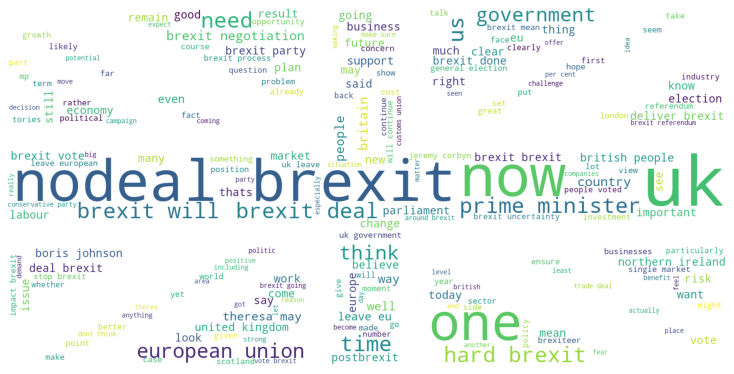

In [ ]:
# Generate the wordcloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import string
quotation_words = ''
stopwords = set(STOPWORDS) 
qute_txt='/content/drive/Shareddrives/Ada/processed/qutos_trial_lda.txt'

if not os.path.exists(qute_txt):
  with open(qute_txt,"w+") as f:
    # iterate through the csv file 
    for val in df.quotation_processed: 
      # typecaste each val to string 
      val = str(val)
      for c in string.punctuation:
        val = val.replace(c,'') 
      # split the value 
      tokens = val.split() 
      #Converts each token into lowercase 
      for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()
      for words in tokens: 
        f.write(str(words)+ '\n')
  f.close()

quotation_words=open (qute_txt).read()
mask = np.array(Image.open('/content/drive/Shareddrives/Ada/img/Flag_of_the_United_Kingdom.png'))
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            mask=mask,
            stopwords = stopwords, 
            min_font_size = 10).generate(quotation_words) 

# plot the WordCloud image                        
plt.figure(figsize = (10, 20), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 
## stop words

We see that Brexit and no deal are the most predominant words in the quote. Then comes prime minister, government, european union. 
We can also see some popular names such as Boris Johnson and Theresa May.
Through this word cloud, we can actually say that the filtered quotes capture the topic of Brexit well and are consistent. 


###III.2 How many active speakers are mentioned?



In [ ]:
print("The number of unique speakers related to Brexit is: ", df['label'].nunique())

The number of unique speakers related to Brexit is:  14456


In [ ]:
#aggregate data
df_speakers = df.groupby(df['label'])['id'].count().reset_index().rename(columns={'label':'speakers','id':'number of quotations'}).sort_values(['number of quotations'],ascending=False)

In [ ]:
#plot figure
fig = px.bar(df_speakers.head(20),x='number of quotations', y='speakers', orientation='h')
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

fig.show()

We can see that the most popular speaker is Theresa May, former Prime Minister. This is not surprising knowing that she was in the midst of this whole Brexit issue and did all her companionship around it. Next is the current Prime Minister, Boris Johnson, of the Conservative Party, who was also involved in the Brexit issue. 
In 19th spot we find Donald Trump , who was the President of the USA for most of the time studied. For more details on the speakers, their parties and their views, please refer to our topic analysis (LDA).

3. How top 10 active speakers' sentiments changed over recent years? 


In [ ]:
# Get the top 10 speakers for Brexit for all periods
top10_speakers=df_speakers['speakers'].head(10).tolist()
top10_speakers

['Theresa May',
 'Boris Johnson',
 'Nigel Farage',
 'Jeremy Corbyn',
 'Nicola Sturgeon',
 'Donald Tusk',
 'Leo Varadkar',
 'Michel Barnier',
 'Vince Cable',
 'Simon Coveney']

In [ ]:
df_top10_speakers=df[df['label'].isin(top10_speakers)].groupby(['label','year','emotion','nationality','occupation','religion','gender'])['id'].count().reset_index()
df_top10_speakers=df_top10_speakers.rename(columns={'id': 'yearly_counts','label':'speaker'})
df_top10_speakers

,speaker,year,emotion,nationality,occupation,religion,gender,yearly_counts
0,Boris Johnson,2015,negative,United States of America,journalist,Anglicanism,male,2
1,Boris Johnson,2015,positive,United States of America,journalist,Anglicanism,male,1
2,Boris Johnson,2016,negative,United States of America,journalist,Anglicanism,male,35
3,Boris Johnson,2016,neutral,United States of America,journalist,Anglicanism,male,18
4,Boris Johnson,2016,positive,United States of America,journalist,Anglicanism,male,38
...,...,...,...,...,...,...,...,...
151,Vince Cable,2019,negative,United Kingdom,politician,0,male,102
152,Vince Cable,2019,neutral,United Kingdom,politician,0,male,29
153,Vince Cable,2019,positive,United Kingdom,politician,0,male,43
154,Vince Cable,2020,negative,United Kingdom,politician,0,male,1


In [ ]:
fig = px.bar(df_top10_speakers, x="year", y="yearly_counts", color="emotion", barmode="stack",
             facet_col="speaker", facet_col_wrap=5,
             category_orders={"speaker": top10_speakers})
fig.show()

We first notice the wide discrepancy between the amount of citations coming from the first two speakers compared to the remaining top 10 speakers. This difference must be even more drastic for the rest of the speakers.
We can see that most of the quotes from Theresa May contain a positive sentiment towards the Brexit. While this may seem surprising, we see that Boris Johnson's quotes are mostly negative, but keep in mind that the sentiment analysis retained the overall sentiment of the quote, not the opinion on the Brexit.

4. What are the main topics discussed?

<font color=red> For this section, please refer to the notebook LDA.ipynb, which contains the LDA analysis and the analysis of speakers that are for or against brexit. Note that we seperated the notebooks because the LDA analysis requires older versions of packages which is not alligned with the rest of analysis.</font>

 To directly view the results, you can click on the [associated  Colab  ](https://colab.research.google.com/drive/1hQdMwsentZT8Zl9iClamRs3ln2DXXqmU#scrollTo=9847f616)

5. Where do they come from?



In [ ]:
# The plot shows the ranking of speaker's nationality by the amount of Brexit related quotations
nationality_df=df[df['nationality']!='0'].reset_index()
country_code_df=country_code_df.rename(columns={'id':'country_code','country':'nationality'})

In [ ]:
# Some of nationalities do not make sense such as Yuan Empire, Tang Dynasty, Australasia at the Olympics etc. 
# All we could do is to manually correct those errors to match 3-digits ISO code for the further plot.
nationality_df['nationality']=nationality_df['nationality'].str.replace('Australasia at the Olympics', 'Australia',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('Australians', 'Australia',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace(r'(^.*China.*$)|(^.*dynasty.*$)|(^.*Empire.*$)', 'China',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('Northern Ireland', 'United Kingdom',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('Wales', 'United Kingdom',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('Northern Ireland', 'United Kingdom',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('The Netherlands', 'Netherlands',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('Netherlandss', 'Netherlands',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('State of Palestine', 'Palestine',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('British Hong Kong', 'Hong Kong',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('British India', 'India',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('Czechoslovakia', 'Czech Republic',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('Canada–United States border', 'United States',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('Dominican Republic', 'Dominica',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('East Germany', 'Germany',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('England', 'United Kingdom',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('English people', 'United Kingdom',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('Great Britain','United Kingdom',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('Kingdom of England','United Kingdom',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('Kingdom of Scotland','United Kingdom',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('Kingdom of Netherland', 'Netherlands',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('Lithuanian Soviet Socialist Republic', 'Lithuania',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('North Macedonia', 'Macedonia',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('Protectorate of Bohemia and Moravia', 'Czech Republic',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('Scotland', 'United Kingdom',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('Socialist Federal Republic of Yugoslavia', 'Serbia',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('South Korea', 'Korea',case=False)	
nationality_df['nationality']=nationality_df['nationality'].str.replace('Soviet Union', 'Russia',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('The Bahamas', 'Bahamas',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('The Gambia', 'Gambia',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('Turkish Republic of Northern Cyprus', 'Turkey',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('United States of America', 'United States',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('United Kingdom of Great Britain and Ireland', 'United Kingdom',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('United Kingdom of United Kingdom and Ireland', 'United Kingdom',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('Kingdom of United Kingdom', 'United Kingdom',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('United States of America', 'United States',case=False)
nationality_df['nationality']=nationality_df['nationality'].str.replace('Federation of Rhodesia and Nyasaland', 'Zimbabwe', case=False)

In [ ]:
rank_nationality=nationality_df.groupby(['nationality'])['label'].nunique().reset_index().rename(columns={'label':'number of speakers'})
rank_nationality=rank_nationality.sort_values(['number of speakers'],ascending=False)
fig = px.bar(rank_nationality.head(20),x='number of speakers', y='nationality', orientation='h')
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
fig.show()

In [ ]:
# we plot the nationalities on an interactive map
plot_speaker_country = pd.merge(left=rank_nationality, right=country_code_df, how="left", on="nationality")
plot_speaker_country.head()

,nationality,number of speakers,country_code
0,United Kingdom,4550,GBR
1,United States,2376,USA
2,Australia,644,AUS
3,Ireland,494,IRL
4,Canada,462,CAN


In [ ]:
fig = px.scatter_geo(plot_speaker_country, locations="country_code", color="nationality",
                     hover_name="nationality", size="number of speakers",
                     projection="natural earth")
fig.show()

Again, we see that most of our speakers are from the UK, which is quite normal. 
Unlike the media, which was concentrated in Europe and the common wealth countries, the second most represented nationality is American. Then we find the European countries and some common wealth countries. One has also to note that the quotations have been extracted mostly from western media, thus the predominance of these regions in the statistics. 


6.  How has the number of active speakers changed over the different periods of Brexits?


In [ ]:
#Plot the histogram to show how the number of active speaker changed over 2015 to 2020
fig = px.bar(df, x="day", y="label", title="Active speaker over time")
fig.update_traces(marker_line_width=0)
fig.show()

We can see that this graph follows the same trend as when analyzing the number of citations. Even though the two most active speakers, Theresa May and Boris Johnson, are heavily represented in the data set, they are not necessarily monopolizing the data as we can observe high and multiple peaks.  
Notice also that after the referendum on 2016, the number of active speakers peaked. 

7. What is their sentiment about the situation, content or not content, independently of their opinion on pro or against Brexit?
 


In [ ]:
# here we take the median over the polarities resulting from 3 different packages
df['polarity']=df[['polarity_Flair','polarity_TextBlob',
       'polarity_SentimentIntensityAnalyze']].median(axis=1)

In [ ]:
# required installation
! pip install pandas --upgrade

     |████████████████████████████████| 11.3 MB 5.2 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.5 which is incompatible.


In [ ]:
import csv
! pip install xlsxwriter

     |████████████████████████████████| 149 kB 5.4 MB/s 


In [ ]:
! pip install openpyxl==3.0.0

     |████████████████████████████████| 172 kB 5.3 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241208 sha256=48b69827353167ed96b17f4a386b60749d9ad8004fa5d8d253994bfee14ea815
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


In [ ]:
# to choose the threshold, we look at 100 different rows and decide on that 
choose_sentiment_analysis_threshold=df[['quotation','polarity']].sample(n = 100)
choose_sentiment_analysis_threshold['quotation']=choose_sentiment_analysis_threshold['quotation'].apply(str)
choose_sentiment_analysis_threshold.head()

,quotation,polarity
56756,"US tax reform, the prospect of a retreat of gl...",0.2023
9187,outlined the steps the government is taking to...,0.7500
25755,"You know, I thought watching yesterday Jo Swin...",0.1475
11101,Both Brexit and the U.S.-China trade war are o...,0.0000
53507,If the EU decides that the theological obsessi...,0.1000


In [ ]:
# Here after we have manually labeled the data, we load it again:
choose_sentiment_analysis_threshold=pd.read_csv('/content/drive/Shareddrives/Ada/Uniform/SentimentAnalysisThreshold.csv')

In [ ]:
choose_sentiment_analysis_threshold.head()

,Unnamed: 0,quotation,polarity,Manual Emotion
0,57162,On the same day the Brexit Secretary was despe...,-0.213611,Negative
1,92522,And whether it's under the guise of alt-right ...,0.493900,Negative
2,26785,Voters will say that this is a man trying to d...,-0.218519,Negative
3,69564,is probably one of the sectors least impacted ...,0.700300,Positive
4,21221,"Depending on what happens on October 31, I thi...",0.102700,Positive


In [ ]:
# create a new dataframe for each sentiment
NEG=choose_sentiment_analysis_threshold[choose_sentiment_analysis_threshold['Manual Emotion']=='Negative']
NEU=choose_sentiment_analysis_threshold[choose_sentiment_analysis_threshold['Manual Emotion']=='Neutral']
POS=choose_sentiment_analysis_threshold[choose_sentiment_analysis_threshold['Manual Emotion']=='Positive']

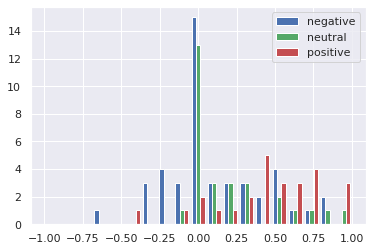

In [ ]:
# first plot the histogram using seaborn
plt.style.use('seaborn-deep')
bins = np.linspace(-1, 1, 20)

plt.hist([NEG.polarity,NEU.polarity, POS.polarity], bins, label=['negative','neutral', 'positive'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
# using plotly
import plotly.figure_factory as ff
fig = ff.create_distplot([NEG.polarity,NEU.polarity, POS.polarity], ['negative','neutral', 'positive'], bin_size=.2)
fig.show()

We can see that the choice of threshold is not necesserly easy. When manually labeling the data, we trying on capturing the tone and overall emotion portrayed by the message, not the opinion on itself. It was not always simple and the results are subjective. After looking at the histograms and trying multiple options, we ended up picking the following thresholds:
  - polarities higher than 0.5 are considered positive.
  - polarities lower than 0.2 are considered negative.
  - the rest is neutral

In [ ]:
# from polarity to emotion
def polarity_to_text2(row):  
      if (row> 0.5): # havent changed it yet 
        #'Polarity is positive 😊'
          return 'positive'
      elif(row <= 0.5 and  row >= 0.2):
          # 'Polarity is neutral 😐'
          return 'neutral'
      else:
        # 'Polarity is negative 😡' 
          return 'negative'

In [ ]:
# assigning the emotion to each point:
for i in range(len(df)):
  df.at[i,'emotion']=polarity_to_text2(df['polarity'][i])

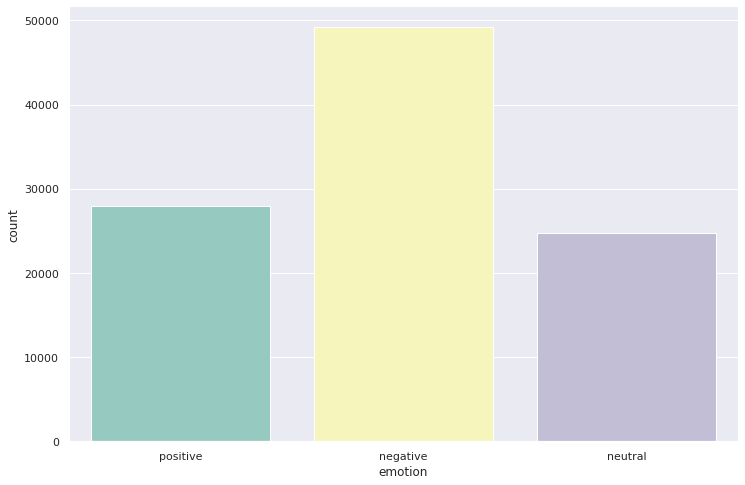

In [ ]:
# barplot of the distribution of the different emotions
plt.figure(figsize=(12,8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="emotion", data=df,palette="Set3")
plt.show()

In [ ]:
# also not workinf
percentages=df.groupby(['emotion'])['id'].count()
percentages=percentages.tolist()
percentages = [x * 100/101878 for x in percentages]
print("Percentages of emotion representation for: \n Negative={:.2f} % \n Neutral={:.2f}% \n Positive={:.2f}% \n".format(percentages[0],percentages[1],percentages[2]))

Percentages of emotion representation for: 
 Negative=48.29 % 
 Neutral=24.26% 
 Positive=27.45% 



We can see from the graph that most of the quotations are negative. They are followed by positive and finally not to far behind by neutral quotations. 

8. Did they change their perception during this period?

We now want to see if the overall emotions changed over time by first looking at the yearly total and then looking at the data as a time series. 


In [ ]:
# 1) yearly total plots: aggregating data
plot_over_days=Sentiment_over_time.groupby(['year','emotion'])['id'].count().reset_index().rename(columns={'id':'counts'})
plot_over_days

,year,emotion,counts
0,2015,negative,196
1,2015,neutral,148
2,2015,positive,163
3,2016,negative,4460
4,2016,neutral,2295
5,2016,positive,2696
6,2017,negative,10935
7,2017,neutral,5821
8,2017,positive,7383
9,2018,negative,12192


In [ ]:
fig = px.bar(plot_over_days, x="year", y="counts", color="emotion", title="Sentiment over years")
fig.update_traces(marker_line_width=0)
fig.show()

In [ ]:
#2) viewing data as a time series
Sentiment_over_time=pd.concat([df['day'], df['emotion'],df['year'],df['id']], axis=1)

In [ ]:
Sentiment_over_time['emotion'].value_counts()

negative    49192
positive    27966
neutral     24720
Name: emotion, dtype: int64

In [ ]:
plot_over_time=Sentiment_over_time.groupby(['day','emotion'])['id'].count().reset_index().rename(columns={'id':'counts'})
plot_over_time

,day,emotion,counts
0,2015-01-01,negative,1
1,2015-01-04,neutral,1
2,2015-01-07,negative,2
3,2015-01-08,negative,2
4,2015-01-14,negative,1
...,...,...,...
4433,2020-04-14,positive,1
4434,2020-04-15,negative,1
4435,2020-04-15,positive,1
4436,2020-04-16,negative,4


In [ ]:
fig = px.bar(plot_over_time, x="day", y="counts", color="emotion", title="Sentiment over time")
fig.update_traces(marker_line_width=0)
fig.show()

The distribution of the different emotions throughout time seem consistant, with the major part of the quotes being negative, and there's no sudden change in tone of the speech.

9. How are the different sentiments of the speakers distributed by countries?
Either using Add Spectal analysis
Either: We add a simpler plot/bar plot / filtering the data

In [ ]:
df=pd.read_pickle('/content/drive/Shareddrives/Ada/Uniform/All_attribute_version1312.pkl')
# drop the na and specify the column we want to keep
df=df.dropna()
col=['label','quotation','nationality','gender','occupation','emotion']
df=df[col]

df=df.query(' "label"!="0" & occupation!="0" & gender!="0" & nationality!="0" ')
df=df.dropna(subset=['occupation','nationality','gender'])
# df=df.drop_duplicates(subset='label')
print("The cleaned row we have (all the attribute without 0):",df.shape[0])

# Get top K datasets based on feature in dataframe
def top_k_feature(X,feature,k):
  X_=pd.DataFrame()
  a=X[feature].value_counts()[:k].index.tolist()
  X_=X.loc[X[feature].isin(a)]
  return X_

# top k features
df=top_k_feature(df,'occupation',10)
df=top_k_feature(df,'nationality',10)
print("Number of rows the top 10 occupation and nationality we have):",df.shape)


# Lists contain attitudes value and occupations
occup=[]
positive=[]
negative=[]
neutral=[]
group1 = df.groupby('occupation')

# Count all the attitude numbers and append to their list
for key, df2 in group1:
    occup.append(key)
    positive.append(df2['emotion'].value_counts()['positive'])
    neutral.append(df2['emotion'].value_counts()['neutral'])
    negative.append(df2['emotion'].value_counts()['negative'])

print('positive',positive)
print('neutral',neutral)
print('negative',negative)

# Construct the souce and value list with the occupation
nation=[]
valued=[]
group2=df.groupby('nationality')
for key, df3 in group2:
  nation.append(key)
  for i in occup:
    try:
      valued.append(df3['occupation'].value_counts()[i])
    except:
      valued.append(0)

print(nation)
print(occup)
print(valued)

# Add all the label in to one
label=[]
emo=["Positive", "Negative","Neutral"]
label.extend(nation)
label.extend(occup)
label.extend(emo)
print(label)

The cleaned row we have (all the attribute without 0): 42661
Number of rows the top 10 occupation and nationality we have): (31056, 6)
positive [233, 350, 72, 179, 103, 129, 879, 6211, 65, 177]
neutral [195, 319, 80, 143, 105, 172, 838, 5502, 78, 233]
negative [381, 680, 166, 222, 153, 335, 1594, 10806, 130, 526]
['Australia', 'Belgium', 'Canada', 'France', 'Germany', 'Ireland', 'Poland', 'Scotland', 'United Kingdom', 'United States of America']
['actor', 'association football player', 'barrister', 'businessperson', 'composer', 'economist', 'journalist', 'politician', 'singer', 'trade unionist']
[14, 56, 0, 10, 3, 24, 24, 238, 9, 1, 0, 0, 0, 2, 0, 2, 5, 245, 0, 0, 22, 24, 0, 1, 3, 206, 12, 216, 9, 0, 11, 11, 0, 22, 1, 43, 7, 503, 2, 1, 5, 26, 0, 3, 0, 92, 21, 255, 9, 0, 21, 265, 0, 14, 268, 3, 29, 2700, 7, 4, 0, 1, 0, 0, 0, 3, 0, 444, 0, 0, 0, 2, 0, 0, 0, 0, 0, 637, 0, 0, 557, 927, 318, 453, 64, 214, 1577, 16734, 200, 930, 179, 37, 0, 39, 22, 49, 1636, 547, 37, 0]
['Australia', 'Belgiu

In [ ]:
# extend the source list to contain the source to emotion
sourced=[]
k=10
for j in range(0,k):
  for i in range(0,k):
      sourced.append(j)

for i in range(0,3):
  for j in range(k,2*k):
      sourced.append(j)

# extend the target list contains the emotion
targetd=[]
for j in range(0,k):
  for i in range(k,2*k):
      targetd.append(i)
for i in range(20,23):
  for j in range(0,k):
        targetd.append(i)

# add the all the attitude to the value list
valued.extend(positive)
valued.extend(negative)
valued.extend(neutral)
print(sourced)
print(targetd)
print(valued)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22]
[14, 56, 0, 10, 3, 24, 24, 238, 9, 1, 0, 0, 0, 2, 0, 2, 5,

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 10,
      thickness = 50,
      line = dict(color = "black", width = 0.5),
      label = label,
      color = ["rgba(31, 119, 180, 0.8)",
                    "rgba(255, 127, 14, 0.8)",
                    "rgba(44, 160, 44, 0.8)",
                    "rgba(214, 39, 40, 0.8)",
                    "rgba(148, 103, 189, 0.8)",
                    "rgba(140, 86, 75, 0.8)",
                    "rgba(227, 119, 194, 0.8)",
                    "rgba(127, 127, 127, 0.8)",
                    "rgba(188, 189, 34, 0.8)",
                    "rgba(23, 190, 207, 0.8)",
                    "rgba(31, 119, 180, 0.8)",
                    "rgba(255, 127, 14, 0.8)",
                    "rgba(44, 160, 44, 0.8)",
                    "rgba(214, 39, 40, 0.8)",
                    "rgba(148, 103, 189, 0.8)",
                    "rgba(140, 86, 75, 0.8)",
                    "rgba(227, 119, 194, 0.8)",
                    "rgba(127, 127, 127, 0.8)",
                    "rgba(188, 189, 34, 0.8)",
                    "rgba(23, 190, 207, 0.8)",
                    "rgba(31, 119, 180, 0.8)",
                    "rgba(255, 127, 14, 0.8)",
                    "rgba(44, 160, 44, 0.8)",
      ]
    ),
    link = dict(
      source=sourced,
      target=targetd,
      value=valued

  ))])

fig.update_layout(title_text="Emotions of top 20 media and websites", font_size=10)

fig.update_layout(
    height=600)
fig.show()


 Here we see how the two nationalities and the work profession seen/have different feelings towards Brexit.  We can see that most professions have a more negative sentiment. Trade unionist, a left wing party mainly from the UK and Ireland, are strongly negative towards Brexit. For journalists, this is still the case, but the split is fairly even between the three emotions. We can also see that most of the people represented coming from the UK are politicians, while in other countries like the US, there are mostly journalists. In addition to journalists and politicians, we can observe that soccer players are very active. This may be due to the fact that the selected data filters out England words for example and that data may contain information about soccer. 